In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Read the CSV file
file_path=r"C:\Users\castl\Downloads\Data_Lionel\Data_Lionel\E143_data\6...HEPData-ins467140-v1-csv\Table14.csv"

In [9]:
#Parse definition
def parse_e143_data(file_path):
    """Parse the E143 data file with multiple Q² sections"""
    all_data=[]
    
    with open(file_path, 'r') as f:
        lines=f.readlines()
    
    current_q2=None
    in_data_section=False
    
    print("Debugging parser - looking for Q² lines:")
    
    for i, line in enumerate(lines):
        original_line=line
        line = line.strip()
        
        # Skip empty lines but check all lines for Q² patterns
        if not line:
            continue
        
        # Look for Q² pattern in comment lines
        if 'Q**2' in line:
            print(f"Line {i+1}: '{line}'")
            # Try to extract Q² value from comment line format: #: Q**2 [GeV^2],2.0
            if ',2.0' in line:
                current_q2 = 2.0
                print(f"Set Q² = 2.0")
            elif ',3.0' in line:
                current_q2 = 3.0
                print(f"Set Q² = 3.0")
            elif ',5.0' in line:
                current_q2 = 5.0
                print(f"Set Q² = 5.0")
            else:
                # Try to parse the number after the comma
                try:
                    parts = line.split(',')
                    if len(parts) > 1:
                        current_q2 = float(parts[1])
                        print(f"Extracted Q² = {current_q2}")
                except (ValueError, IndexError):
                    pass
            in_data_section = False
            continue
        
        # Check for data header
        if line.startswith('X,G1P,stat'):
            print(f"Found data header at line {i+1}, current Q² = {current_q2}")
            in_data_section = True
            continue
        
        # Parse data lines - now including systematic errors
        if in_data_section and current_q2 is not None and ',' in line and not line.startswith('#'):
            try:
                values = line.split(',')
                if len(values) >= 6:  # X, G1P, stat+, stat-, sys+, sys-
                    x = float(values[0])
                    g1p = float(values[1])
                    stat_plus = float(values[2])
                    stat_minus = float(values[3])
                    sys_plus = float(values[4])
                    sys_minus = float(values[5])
                    
                    # Calculate symmetric errors
                    stat_error = (abs(stat_plus) + abs(stat_minus)) / 2
                    sys_error = (abs(sys_plus) + abs(sys_minus)) / 2
                    
                    # Combine statistical and systematic errors in quadrature
                    total_error = np.sqrt(stat_error**2 + sys_error**2)
                    
                    data_point = {
                        'X': x,
                        'G1P': g1p,
                        'stat_error': stat_error,
                        'sys_error': sys_error,
                        'total_error': total_error,
                        'Q2': current_q2
                    }
                    all_data.append(data_point)
                    
                    # Only print first few data points for each Q²
                    if len([d for d in all_data if d['Q2'] == current_q2]) <= 3:
                        print(f"Added data point: Q²={current_q2}, X={x}, G1P={g1p}, total_error={total_error:.3f}")
                        
            except ValueError as e:
                print(f"Error parsing data line: {e} - Line: '{line}'")
                continue
        
        # Reset data section when we hit a new comment block
        if line.startswith('#') and in_data_section:
            in_data_section = False
    
    print(f"Total data points parsed: {len(all_data)}")
    return pd.DataFrame(all_data)

In [10]:
# Parse the data and debug
print("Parsing E143 data file...")
df = parse_e143_data(file_path)

print(f"Successfully parsed {len(df)} data points")

# Only proceed if we have data
if len(df) > 0:
    print(f"Q² values: {sorted(df['Q2'].unique())}")
    print("\nData preview:")
    print(df.head())
else:
    print("No data was parsed. Check the file format.")
    print("Exiting...")
    exit()

Parsing E143 data file...
Debugging parser - looking for Q² lines:
Line 3: '#: description: G1(P) interpolated to fixed Q**2 values for the DIS (W**2 > 4 GeV**2) region assuming G1/F1 indepenedent of Q**2. Additional normalisation uncertainty 3.7%.'
Line 11: '#: Q**2 [GeV^2],2.0'
Set Q² = 2.0
Found data header at line 15, current Q² = 2.0
Added data point: Q²=2.0, X=0.031, G1P=0.272, total_error=0.150
Added data point: Q²=2.0, X=0.035, G1P=0.468, total_error=0.101
Added data point: Q²=2.0, X=0.039, G1P=0.283, total_error=0.081
Line 46: '#: Q**2 [GeV^2],3.0'
Set Q² = 3.0
Found data header at line 50, current Q² = 3.0
Added data point: Q²=3.0, X=0.031, G1P=0.294, total_error=0.162
Added data point: Q²=3.0, X=0.035, G1P=0.504, total_error=0.109
Added data point: Q²=3.0, X=0.039, G1P=0.304, total_error=0.088
Line 81: '#: Q**2 [GeV^2],5.0'
Set Q² = 5.0
Found data header at line 85, current Q² = 5.0
Added data point: Q²=5.0, X=0.031, G1P=0.322, total_error=0.178
Added data point: Q²=5.0, X=0


Creating separate plots for Q² values: [2.0, 3.0, 5.0]

Q² = 2.0 GeV²:
  Number of points: 28
  X range: 0.031 to 0.749
  G1P range: 0.070 to 0.468
  Average total error: 0.035

Q² = 3.0 GeV²:
  Number of points: 28
  X range: 0.031 to 0.749
  G1P range: 0.046 to 0.504
  Average total error: 0.036

Q² = 5.0 GeV²:
  Number of points: 28
  X range: 0.031 to 0.749
  G1P range: 0.026 to 0.552
  Average total error: 0.038

Overall data range:
X: 0.031 to 0.749
G1P: 0.026 to 0.552
Statistical errors: 0.034 ± 0.034
Systematic errors: 0.012 ± 0.010
Total errors: 0.036 ± 0.035


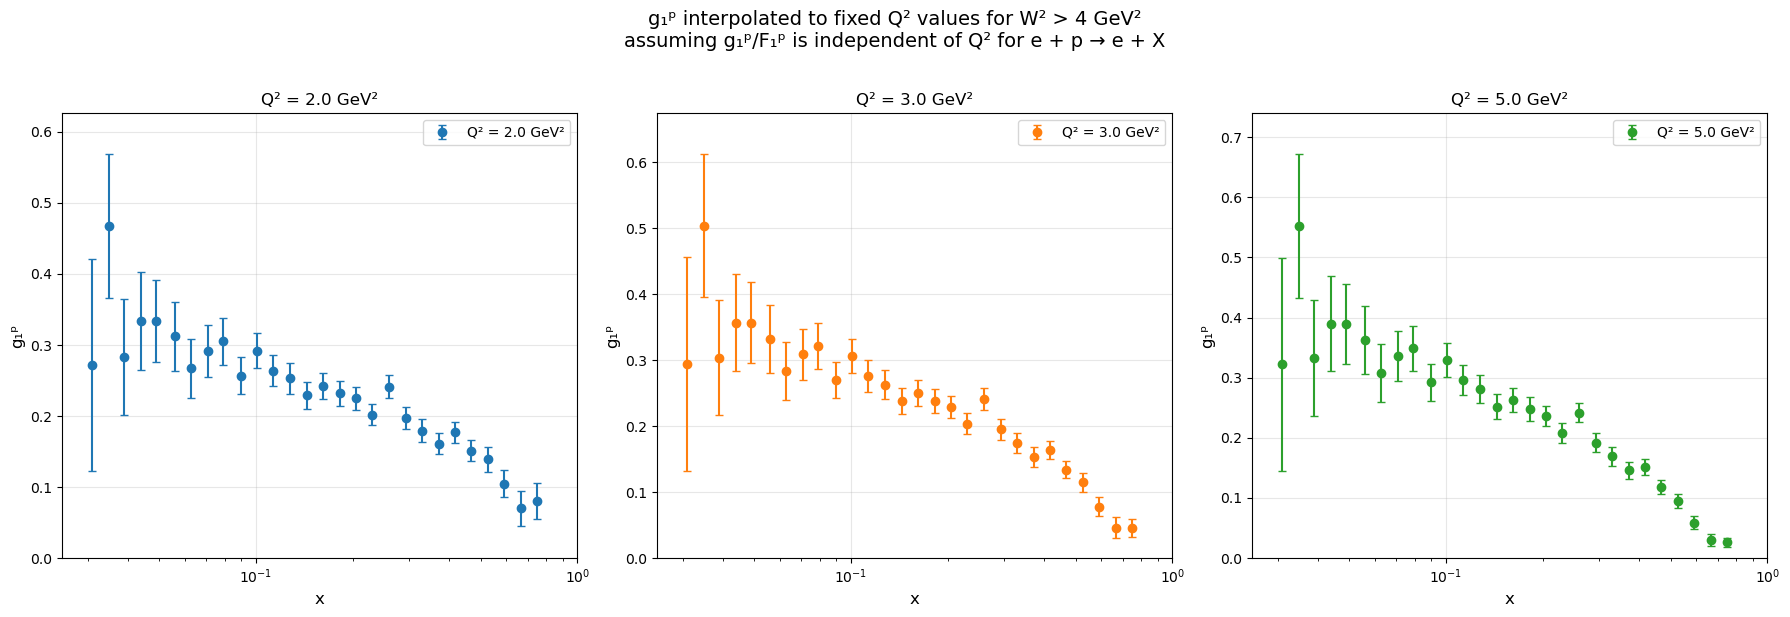

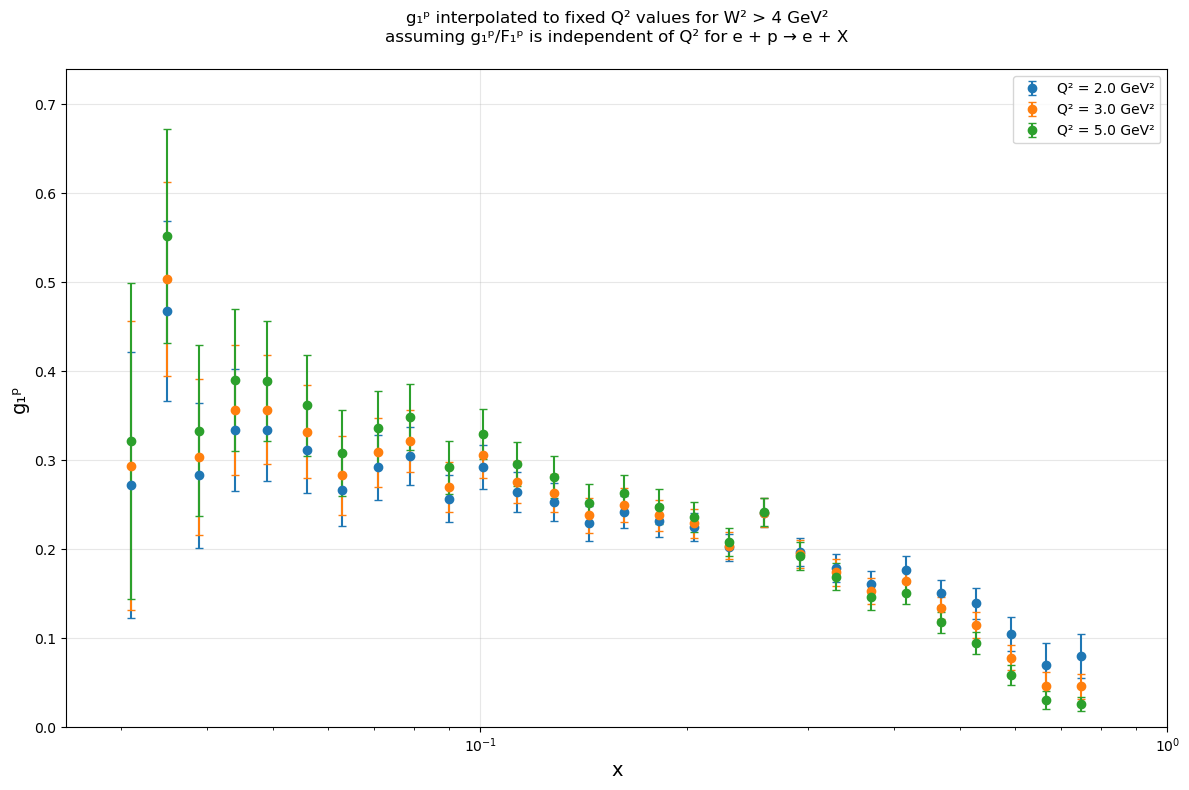

In [11]:
#Plotting
#Get unique Q² values and sort them
q2_values = sorted(df['Q2'].unique())
print(f"\nCreating separate plots for Q² values: {q2_values}")

#Create three separate plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('g₁ᵖ interpolated to fixed Q² values for W² > 4 GeV²\nassuming g₁ᵖ/F₁ᵖ is independent of Q² for e + p → e + X', 
             fontsize=14, y=1.02)

# Define colors for consistency
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot each Q² dataset in its own subplot
for i, q2 in enumerate(q2_values):
    q2_data = df[df['Q2'] == q2]
    
    # Plot with total error bars (statistical + systematic combined)
    axes[i].errorbar(q2_data['X'], q2_data['G1P'], 
                    yerr=q2_data['total_error'], 
                    fmt='o', 
                    color=colors[i],
                    markersize=6,
                    capsize=3,
                    capthick=1,
                    linewidth=1.5,
                    label=f'Q² = {q2:.1f} GeV²',
                    elinewidth=1.5)
    
    # Formatting for each subplot
    axes[i].set_xlabel('x', fontsize=12)
    axes[i].set_ylabel('g₁ᵖ', fontsize=12)
    axes[i].set_title(f'Q² = {q2:.1f} GeV²', fontsize=12)
    
    # Set log scale for x-axis
    axes[i].set_xscale('log')
    
    # Set axis limits - adjusted for log scale and to accommodate all error bars
    axes[i].set_xlim(0.025, 1.0)
    max_y_with_error = (q2_data['G1P'] + q2_data['total_error']).max()
    axes[i].set_ylim(0.0, max_y_with_error * 1.1)
    
    # Add grid
    axes[i].grid(True, alpha=0.3)
    
    # Add legend
    axes[i].legend()
    
    # Print some statistics for each Q²
    print(f"\nQ² = {q2:.1f} GeV²:")
    print(f"  Number of points: {len(q2_data)}")
    print(f"  X range: {q2_data['X'].min():.3f} to {q2_data['X'].max():.3f}")
    print(f"  G1P range: {q2_data['G1P'].min():.3f} to {q2_data['G1P'].max():.3f}")
    print(f"  Average total error: {q2_data['total_error'].mean():.3f}")

# Adjust layout
plt.tight_layout()

# Display overall statistics
print(f"\nOverall data range:")
print(f"X: {df['X'].min():.3f} to {df['X'].max():.3f}")
print(f"G1P: {df['G1P'].min():.3f} to {df['G1P'].max():.3f}")
print(f"Statistical errors: {df['stat_error'].mean():.3f} ± {df['stat_error'].std():.3f}")
print(f"Systematic errors: {df['sys_error'].mean():.3f} ± {df['sys_error'].std():.3f}")
print(f"Total errors: {df['total_error'].mean():.3f} ± {df['total_error'].std():.3f}")

plt.show()

# Optional: Create a comparison plot showing all three datasets together
plt.figure(figsize=(12, 8))

for i, q2 in enumerate(q2_values):
    q2_data = df[df['Q2'] == q2]
    
    # Plot with total error bars
    plt.errorbar(q2_data['X'], q2_data['G1P'], 
                yerr=q2_data['total_error'], 
                fmt='o', 
                color=colors[i],
                markersize=6,
                capsize=3,
                capthick=1,
                linewidth=1.5,
                elinewidth=1.5,
                label=f'Q² = {q2:.1f} GeV²')

# Formatting for comparison plot
plt.xlabel('x', fontsize=14)
plt.ylabel('g₁ᵖ', fontsize=14)
plt.title('g₁ᵖ interpolated to fixed Q² values for W² > 4 GeV²\nassuming g₁ᵖ/F₁ᵖ is independent of Q² for e + p → e + X', 
          fontsize=12, pad=20)

# Set log scale for x-axis
plt.xscale('log')

# Set axis limits - adjusted for log scale and to accommodate all error bars
plt.xlim(0.025, 1.0)
max_y_with_error = (df['G1P'] + df['total_error']).max()
plt.ylim(0.0, max_y_with_error * 1.1)

# Add grid
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

plt.show()